<a href="https://colab.research.google.com/github/jbuzzio/DeepLearning/blob/main/01_exploraci%C3%B3n_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
!pip install gdown

# Descarga y descompresion del dataset que se encuentra en google drive

In [68]:
file_id = "1LjpdAiNaD-C67WNswE5pE-6MNEh4LtKj" #ID del archivo en google drive

# Descargar el archivo
!gdown --id "$file_id" -O "$destination"

# Descomprimir el archivo
!unzip -q "$destination" -d "/content"
!rm cicddos2019_dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1LjpdAiNaD-C67WNswE5pE-6MNEh4LtKj
From (redirected): https://drive.google.com/uc?id=1LjpdAiNaD-C67WNswE5pE-6MNEh4LtKj&confirm=t&uuid=6bdf2fe5-2910-4c1c-97e4-bc62649de884
To: /content/cicddos2019_dataset.zip
100% 168M/168M [00:01<00:00, 164MB/s]


In [69]:
import os
import numpy as np
import sklearn.preprocessing as skpp
import pandas as pd
import random
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar el dataset

In [70]:
dataset = np.load("/content/cicddos2019_dataset.npz")
X = dataset['X']
y = dataset['y']

In [71]:
labels = pd.DataFrame(y, columns=['label'])
labels

,label
0,DrDoS_DNS
1,DrDoS_DNS
2,DrDoS_DNS
3,DrDoS_DNS
4,DrDoS_DNS
...,...
161984,UDPLag
161985,UDPLag
161986,UDPLag
161987,UDPLag


# Distribucion de las clases en el dataset

In [72]:
distribucion_clases= {}
for i in labels['label'].unique():
  distribucion_clases[i] =len(labels[labels['label'] == i])

In [73]:
distribucion_clases

{'DrDoS_DNS': 27270,
 'DrDoS_LDAP': 11896,
 'DrDoS_MSSQL': 24422,
 'DrDoS_NetBIOS': 22019,
 'DrDoS_NTP': 6642,
 'DrDoS_SNMP': 28607,
 'DrDoS_SSDP': 14269,
 'DrDoS_UDP': 17188,
 'Normal': 174,
 'Syn': 7666,
 'UDPLag': 1836}

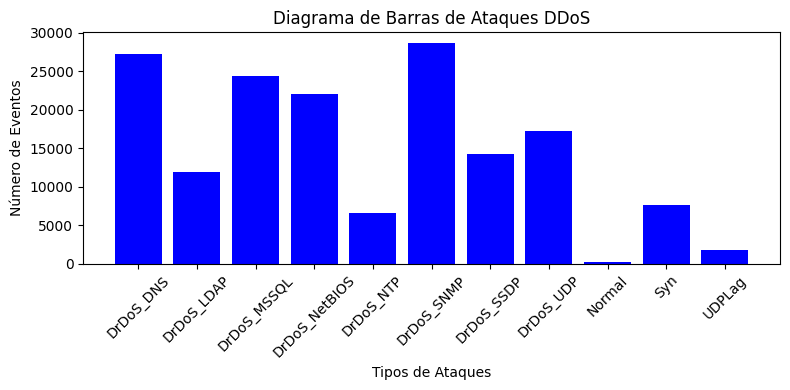

In [74]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 4))
plt.bar(distribucion_clases.keys(),distribucion_clases.values(), color='blue')
plt.title('Diagrama de Barras de Ataques DDoS')
plt.xlabel('Tipos de Ataques')
plt.ylabel('Número de Eventos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El dataset consta de 161989 imágenes producto de transformar el dataset CICDDoS2019. Cada imagen tiene una dimension de 60x60 con 3 canales.

In [75]:
X.shape, labels.shape

((161989, 60, 60, 3), (161989, 1))

In [76]:
clases = np.unique(labels)
print("Clases únicas:", clases)

Clases únicas: ['DrDoS_DNS' 'DrDoS_LDAP' 'DrDoS_MSSQL' 'DrDoS_NTP' 'DrDoS_NetBIOS'
 'DrDoS_SNMP' 'DrDoS_SSDP' 'DrDoS_UDP' 'Normal' 'Syn' 'UDPLag']


# Ploteamos algunas imágenes del dataset


In [77]:
muestras = {}

for clase in clases:
    # Encuentra el índice de la primera imagen de esta clase
    indice = np.where(y == clase)[0][0]
    muestras[clase] = X[indice]

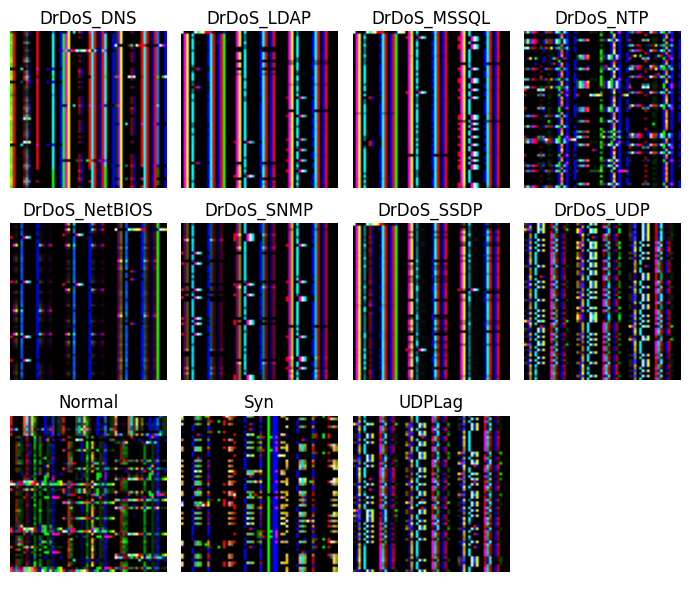

In [78]:
num_clases = len(clases)

# Crea la figura y subplots
fig, axes = plt.subplots(3, 4, figsize=(7, 6))
axes = axes.flatten()  # Aseguramos que los ejes sean una lista plana

# Rellena los subplots con las imágenes representativas
for i, clase in enumerate(clases):
    axes[i].imshow(muestras[clase])
    axes[i].set_title(f"{clase}")
    axes[i].axis("off")  # Oculta los ejes

# Desactiva subplots vacíos si hay más subplots que clases
for j in range(num_clases, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()